<a href="https://colab.research.google.com/github/RafalDoroz/mun/blob/main/VotingClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importujemy potrzebne biblioteki
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier  # Bazowy klasyfikator
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Wczytujemy dane - zestaw cancer
cancer = load_breast_cancer()
X = cancer.data  # Dane wejściowe (cechy)
y = cancer.target  # Etykiety (klasy)


In [ ]:
# Tworzymy DataFrame z danymi cancer
cancer_df = pd.DataFrame(data=X, columns=cancer.feature_names)
cancer_df['target'] = y


In [ ]:
# Podział danych na zbiór treningowy i testowy (70% - trening, 30% - test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Inicjalizujemy model Bagging z bazowym klasyfikatorem Decision Tree
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),  # Używamy drzew decyzyjnych jako bazowych klasyfikatorów
    n_estimators=50,                          # Liczba bazowych klasyfikatorów (drzew)
    max_samples=0.8,                          # Używamy 80% próbek danych do trenowania każdego modelu
    max_features=0.8,                         # Używamy 80% cech do trenowania każdego modelu
    random_state=42                           # Ustawiamy random_state dla powtarzalności wyników
)


In [ ]:
# Trenujemy model na danych treningowych
bagging_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=0.8,
                  max_samples=0.8, n_estimators=50, random_state=42)

In [ ]:
# Dokonujemy predykcji na danych testowych
y_pred = bagging_clf.predict(X_test)



In [ ]:
# Wyświetlamy dokładność modelu
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Dokładność modelu Bagging: {accuracy}')


Dokładność modelu Bagging: 0.9707602339181286


In [ ]:
# Wyświetlamy macierz pomyłek
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(f"Macierz pomyłek:\n{conf_matrix}")


Macierz pomyłek:
[[ 60   3]
 [  2 106]]


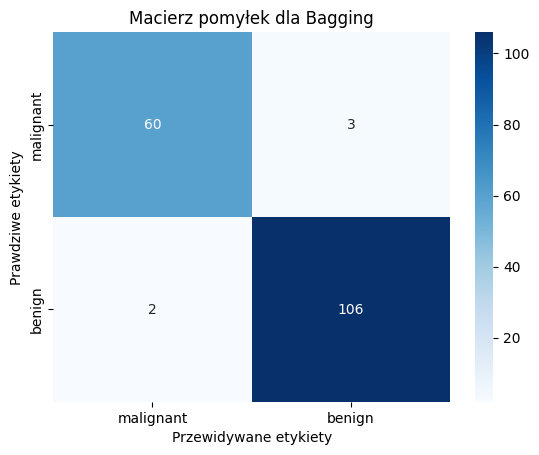

In [ ]:
# Wizualizacja macierzy pomyłek
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Przewidywane etykiety')
plt.ylabel('Prawdziwe etykiety')
plt.title('Macierz pomyłek dla Bagging')
plt.show()
